### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
advertising = pd.read_csv("C:/Users/Damodhara/Desktop/Desktop/ML Practise Kaggle data Sets/Sales.csv")

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

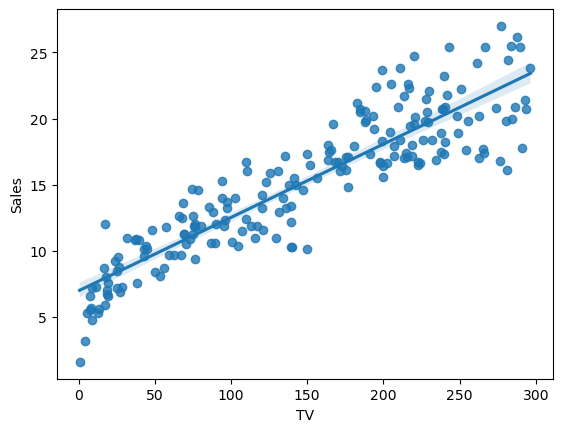

In [8]:
sns.regplot(x='TV',y='Sales',data=advertising)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

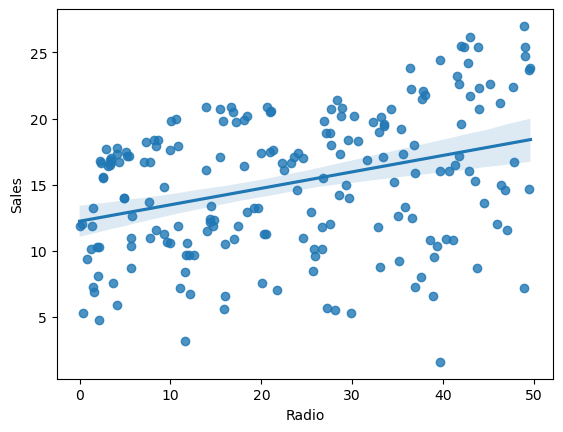

In [9]:
#Relation ship between radio and sales
sns.regplot(x="Radio",y="Sales", data=advertising)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

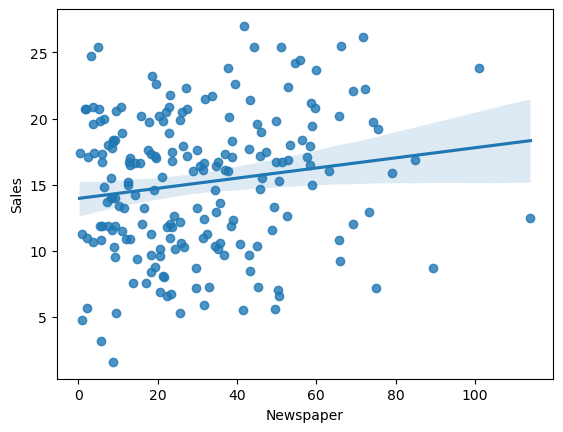

In [10]:
#Relationship between Newspaper and Sales
sns.regplot(x="Newspaper",y='Sales',data=advertising)

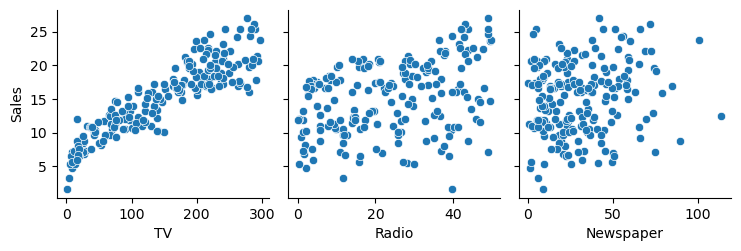

In [11]:
sns.pairplot(data = advertising, x_vars=["TV","Radio","Newspaper"], y_vars="Sales")

In [12]:
#checking correlation between various variabules
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

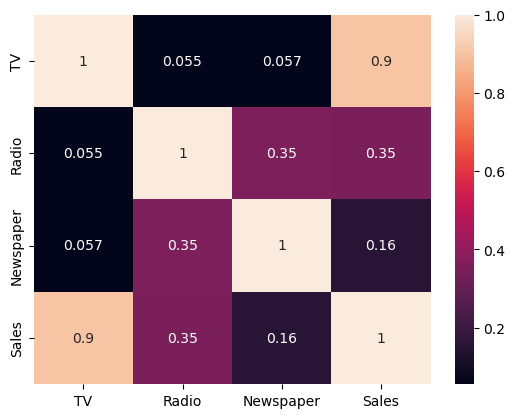

In [13]:
sns.heatmap(advertising.corr(),annot=True)

In [14]:
#Create X and y
X=advertising["TV"]
y=advertising["Sales"]

In [15]:
#Train-Test Split
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, random_state=100)
y_test.shape

(60,)

In [16]:
#Training the model
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [17]:
#training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [18]:
# y= m1.X1+c

# y= c. Constant + m1. TV

#fitting the model

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

# 6.94+ 0.05*TV

const    6.948683
TV       0.054546
dtype: float64

In [19]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.52e-52
Time:                        18:39:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#coef  and p-value
#R squred is 81.6%
#Prob (F-statistic): ----> is low => the fit is not only by chance 


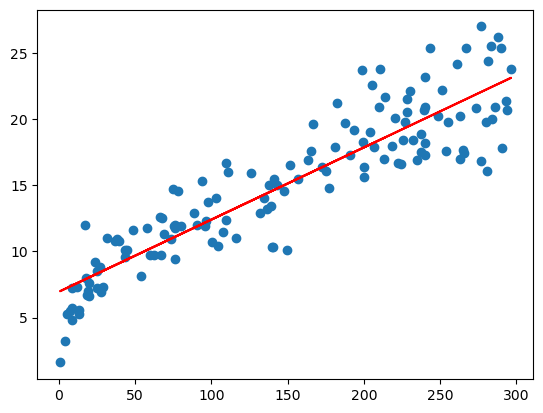

In [21]:
plt.scatter (X_train,y_train)

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred
plt.plot(X_train, y_train_pred,'r')
plt.show()

In [22]:
#error=f(y_train,y_train_pred)

In [23]:
res=y_train-y_train_pred

Text(0.5, 1.0, 'Residual Plot')

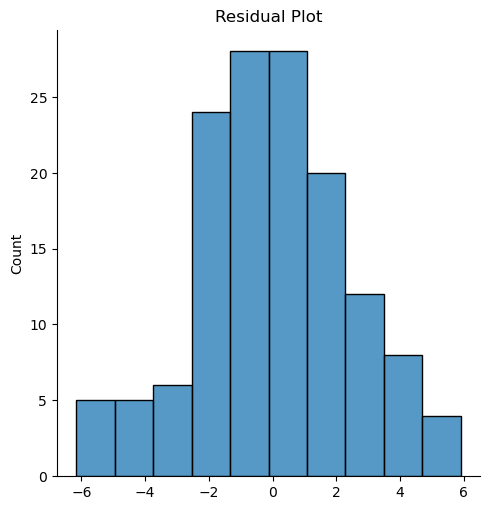

In [24]:
#plot the residuals

sns.displot(res)
plt.title("Residual Plot")

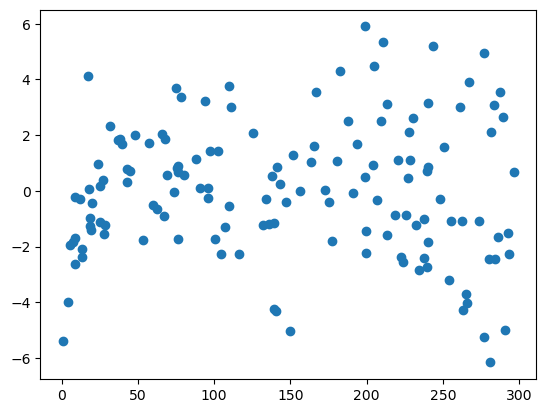

In [25]:
#look for patterns in residuals
plt.scatter(X_train,res)
plt.show()

### Step: Prediction and Evaluation on Test Set


In [26]:
#prediction on the test set(y_test_pred)
#evaluate the model,r-squared, on the test

In [27]:
#add a constant/intercept to test
X_test_sm=sm.add_constant(X_test)
#pred on test
y_test_pred=lr_model.predict(X_test_sm)

In [28]:
#evaluate the model, r-squared, on the test
#r-squared
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [29]:
#r2 on train
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8157933136480389

In [30]:
#mean squared error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826956

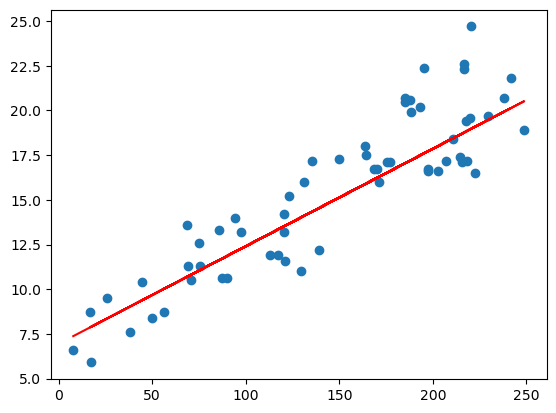

In [31]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

## Linear regression using sklearn

In [32]:
#train test set
#train - test Split

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, random_state=100)
y_test.shape

#reshape t0(140,1)
x_train_lm = X_train.values.reshape(-1,1) 
x_test_lm = X_test.values.reshape(-1,1)

In [33]:
#steps in Sklearn model building 

#1. Create an object of linear Regression model 

lm = LinearRegression()

#2. fit the model

lm.fit(x_train_lm,y_train)

#3. see the parameters, make prediction (train , test)

print(lm.coef_)
print(lm.intercept_)

#4.make prediction 

y_train_pred = lm.predict(x_train_lm)
y_test_pred = lm.predict(x_test_lm)

[0.05454575]
6.9486832000013585


In [35]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

NameError: name 'y_pred' is not defined